# Python Implementation

In [2]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Initializing the dataframe
data = pd.read_csv('boston_house_rent.csv')

In [4]:
# See head of the dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


CRIM per capita crime rate by town <br>
ZN proportion of residential land zoned for lots over 25,000 sq.ft. <br>
INDUS proportion of non-retail business acres per town <br>
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) <br>
NOX nitric oxides concentration (parts per 10 million) <br>
RM average number of rooms per dwelling <br>
AGE proportion of owner-occupied units built prior to 1940 <br>
DIS weighted distances to five Boston employment centres <br>
RAD index of accessibility to radial highways <br>
TAX full-value property-tax rate per 10,000usd <br>
PTRATIO pupil-teacher ratio by town <br>
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
LSTAT % lower status of the population <br>

Each record in the database describes a Boston suburb or town.

In [5]:
# Any missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [6]:
# Dataset analysis/stats using describe method. 
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

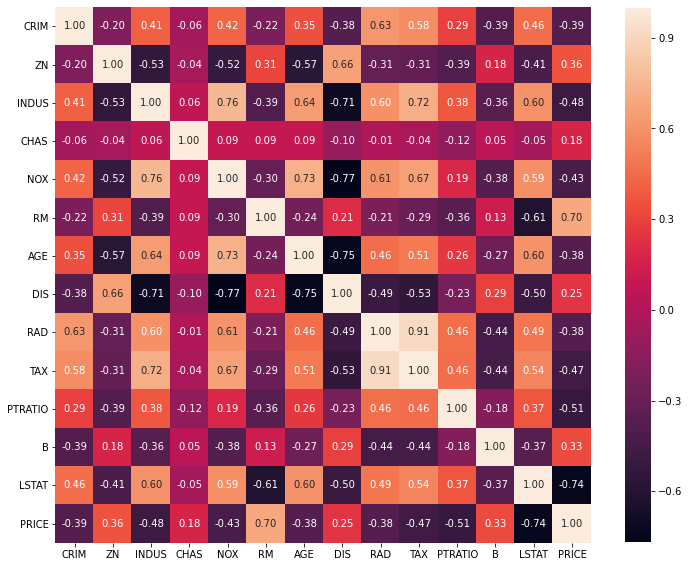

In [8]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(12,12))

sns.heatmap(corr, cbar=True, square= True,cbar_kws={"shrink": .82}, fmt='.2f', annot=True, annot_kws={'size':10})
plt.show()

### Seems RAD and TAX are correlated. Lets check with scatter plot

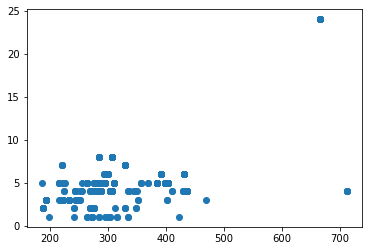

In [9]:
plt.scatter(data.TAX, data.RAD)
plt.show()

It is not confirmed with plot. So we are not deleting any features.

In [10]:
# dividing feature and label data
X = data.drop(columns=['PRICE'], axis = 1)
y = data['PRICE']

In [11]:
# train test split (hold out method)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 100)

## AdaBoost model training

In [12]:
from sklearn.ensemble import AdaBoostRegressor

In [13]:
ada = AdaBoostRegressor()

In [14]:
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [15]:
# Model prediction on train data
y_pred = ada.predict(X_train)

In [16]:
print('R square score',metrics.r2_score(y_train, y_pred))

R square score 0.9040408731904626


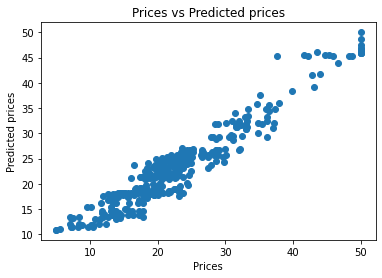

In [17]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [18]:
# Predicting Test data with the model
y_test_pred = ada.predict(X_test)

In [19]:
# Model Evaluation
accuracy = metrics.r2_score(y_test, y_test_pred)
print('R square score:', accuracy)

R square score: 0.7837355358162338


## Hyperparameter Tuning using RandomizedSearchCV

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [21]:
dt = DecisionTreeRegressor()

In [22]:
params = {'n_estimators':[40,47,49,50], 'learning_rate':[0.30,0.40,0.45]}

In [23]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [24]:
rnd_srch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [25]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=47)

In [26]:
ada = AdaBoostRegressor(base_estimator=dt,learning_rate=0.4,n_estimators=47)

ada.fit(X_train,y_train)

y_pred= ada.predict(X_test)

print ('****accuracy post tuning****') 
print (metrics.r2_score(y_test,y_pred))

****accuracy post tuning****
0.8986883287757995
